# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
!pip install citipy
!pip install spicy

You should consider upgrading via the 'C:\Users\cetin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\cetin\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# The list of lat_lngs and cities
lat_lngs = []
cities = []

# The set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# The nearest city for each lat,Lng
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city)
        
len(cities)

613

In [5]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [6]:
print("Beginning Data Retrieval ")
print("------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response["main"]["temp_max"])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        else:
            index_counter = index_counter + 1
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")

print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")

Beginning Data Retrieval 
------------------------------
Processing Record 1 of Set 1 : half moon bay
City not found. Skipping...
Processing Record 2 of Set 1 : guerrero negro
Processing Record 3 of Set 1 : mataura
Processing Record 4 of Set 1 : mahebourg
Processing Record 5 of Set 1 : yashalta
Processing Record 6 of Set 1 : vaini
Processing Record 7 of Set 1 : arraial do cabo
Processing Record 8 of Set 1 : cape town
Processing Record 9 of Set 1 : verkhnyaya toyma
Processing Record 10 of Set 1 : mitsamiouli
Processing Record 11 of Set 1 : faya
Processing Record 12 of Set 1 : jinzhou
City not found. Skipping...
Processing Record 13 of Set 1 : hokitika
Processing Record 14 of Set 1 : cacador
Processing Record 15 of Set 1 : grand gaube
Processing Record 16 of Set 1 : haines junction
Processing Record 17 of Set 1 : tautira
Processing Record 18 of Set 1 : new norfolk
Processing Record 19 of Set 1 : bredasdorp
Processing Record 20 of Set 1 : bluff
Processing Record 21 of Set 1 : ushuaia
Proc

Processing Record 33 of Set 4 : pangnirtung
Processing Record 34 of Set 4 : najran
City not found. Skipping...
Processing Record 35 of Set 4 : florianopolis
Processing Record 36 of Set 4 : paamiut
Processing Record 37 of Set 4 : labuhan
Processing Record 38 of Set 4 : baykit
Processing Record 39 of Set 4 : tiksi
City not found. Skipping...
Processing Record 40 of Set 4 : altamira
Processing Record 41 of Set 4 : mehamn
Processing Record 42 of Set 4 : ukiah
Processing Record 43 of Set 4 : grindavik
Processing Record 44 of Set 4 : bertoua
Processing Record 45 of Set 4 : narsaq
Processing Record 46 of Set 4 : gisborne
Processing Record 47 of Set 4 : lorengau
Processing Record 48 of Set 4 : catuday
Processing Record 49 of Set 4 : vardo
Processing Record 50 of Set 4 : coihaique
Processing Record 0 of Set 5 : riachao das neves
Processing Record 1 of Set 5 : airai
City not found. Skipping...
Processing Record 2 of Set 5 : bubaque
Processing Record 3 of Set 5 : sorong
Processing Record 4 of Set

Processing Record 20 of Set 8 : bilibino
Processing Record 21 of Set 8 : beinamar
Processing Record 22 of Set 8 : martapura
Processing Record 23 of Set 8 : waipawa
Processing Record 24 of Set 8 : bilma
Processing Record 25 of Set 8 : mbigou
Processing Record 26 of Set 8 : sao filipe
Processing Record 27 of Set 8 : cochrane
Processing Record 28 of Set 8 : odweyne
City not found. Skipping...
City not found. Skipping...
Processing Record 29 of Set 8 : te anau
Processing Record 30 of Set 8 : boyolangu
Processing Record 31 of Set 8 : sokol
Processing Record 32 of Set 8 : dunedin
Processing Record 33 of Set 8 : pasuruan
Processing Record 34 of Set 8 : palmer
Processing Record 35 of Set 8 : souillac
City not found. Skipping...
Processing Record 36 of Set 8 : jumla
Processing Record 37 of Set 8 : kijang
Processing Record 38 of Set 8 : faanui
Processing Record 39 of Set 8 : comodoro rivadavia
Processing Record 40 of Set 8 : douentza
Processing Record 41 of Set 8 : clyde river
City not found. Sk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [19]:
#creating a dataframe 
weather_df = pd.DataFrame({"City": city_list,
                           "Lat": lat_list,    "Lng": lng_list,
                           "Max Temp": max_temp_list,
                           "Humidity": humidity_list,
                           "Cloudiness": cloud_list,
                           "Wind Speed": wind_speed_list,
                           "Country": country_list,
                           "Date": date_list})

weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Half Moon Bay,37.4636,-122.4286,65.44,85,100,19.57,US,1651722807
1,Guerrero Negro,27.9769,-114.0611,59.72,81,0,13.47,MX,1651722810
2,Mataura,-46.1927,168.8643,66.47,69,47,2.08,NZ,1651722810
3,Mahébourg,-20.4081,57.7000,78.26,83,40,14.97,MU,1651722811
4,Yashalta,46.3395,42.2762,55.90,71,100,5.14,RU,1651722811
...,...,...,...,...,...,...,...,...,...
552,Koumac,-20.5667,164.2833,79.00,77,58,7.61,NC,1651723022
553,Berezovyy,51.6667,135.7000,49.91,77,100,2.39,RU,1651723022
554,Berlevåg,70.8578,29.0864,24.80,69,92,7.78,NO,1651723023
555,Teeli,51.0333,90.2333,41.32,34,100,3.02,RU,1651723023


In [20]:
#Display the Data Frame
weather_df.head(15)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Half Moon Bay,37.4636,-122.4286,65.44,85,100,19.57,US,1651722807
1,Guerrero Negro,27.9769,-114.0611,59.72,81,0,13.47,MX,1651722810
2,Mataura,-46.1927,168.8643,66.47,69,47,2.08,NZ,1651722810
3,Mahébourg,-20.4081,57.7000,78.26,83,40,14.97,MU,1651722811
4,Yashalta,46.3395,42.2762,55.90,71,100,5.14,RU,1651722811
5,Vaini,-21.2000,-175.2000,75.36,94,75,3.44,TO,1651722812
6,Arraial do Cabo,-22.9661,-42.0278,75.31,88,88,8.01,BR,1651722812
7,Cape Town,-33.9258,18.4232,57.11,94,100,2.30,ZA,1651722812
8,Verkhnyaya Toyma,62.2349,44.9985,32.50,61,72,6.44,RU,1651722813
9,Mitsamiouli,-11.3847,43.2844,75.49,83,20,5.75,KM,1651722813


In [21]:
#Export the data to csv
weather_df.to_csv("../output_data/cities.csv", index = False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [22]:
#check if there is any city with a humidity higher than 100%
greater_humidity = weather_df.query("Humidity > 100")
print(greater_humidity)

Empty DataFrame
Columns: [City, Lat, Lng, Max Temp, Humidity, Cloudiness, Wind Speed, Country, Date]
Index: []


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

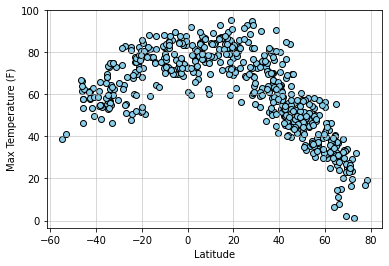

In [36]:
#scatter plot Latitute vs Temperature 
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], color = "skyblue", edgecolor = "black")

#labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#title
plt.title = ("City Latitude vs Max Temperature Plot")

#saving the image
#plt.savefig("../Python-APIs/City Latitude vs Max Temperature Plot.png")

## Latitude vs. Humidity Plot

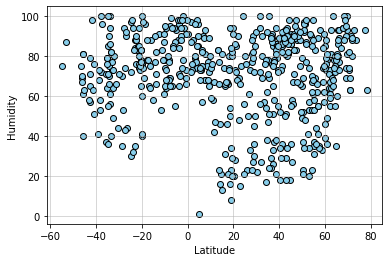

In [37]:
#scatter plot Latitute vs Humidity  
plt.scatter(weather_df["Lat"], weather_df["Humidity"], color = "skyblue", edgecolor = "black")

#labels
plt.xlabel("Latitude")
plt.ylabel("Humidity")

#grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#title
plt.title = ("City Latitude vs Humidity")

#saving the image
#plt.savefig("../Python-APIs/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

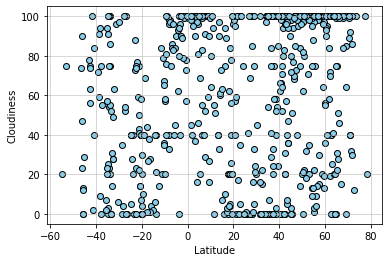

In [38]:
#scatter plot Latitute vs Cloudiness  
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], color = "skyblue", edgecolor = "black")

#labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

#grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#title
plt.title = ("City Latitude vs Cloudiness")

#saving the image
#plt.savefig("../Python-APIs/City Latitude vs Cloudiness")

## Latitude vs. Wind Speed Plot

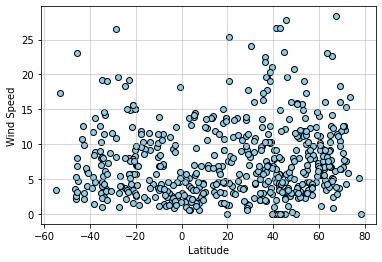

In [39]:
#scatter plot Latitute vs Wind Speed  
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], color = "skyblue", edgecolor = "black")

#labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

#grid line
plt.grid(linestyle = "-", linewidth = 1, alpha = 0.5)

#title
plt.title = ("City Latitude vs Wind Speed")

#saving the image
#plt.savefig("../Python-APIs/City Latitude vs Wind Speed.png")

## Linear Regression

In [50]:
#Northern and Southern Hemisphere
northern_hemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southern_hemisphere = weather_df.loc[weather_df["Lat"] < 0]

#linear agression and scatter plot def
def linear_agression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values, "r-")
    return line_eq

#annotate def
def annotate(line_eq, a,b):
    plt.annotate(line_eq,(a,b), fontsize=10, color="red")
    

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.86


Text(0, 0.5, 'Max Temperature (F)')

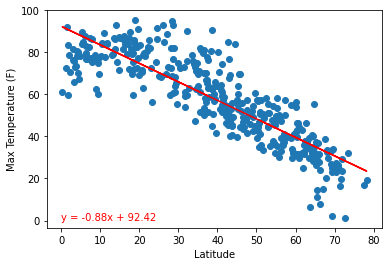

In [51]:
#The plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])
annotate(equation, 0 ,0)

#title
plt.title = ("Northern Hemisphere - Max Temp vs Latitude Linear Regression")

#labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#saving the image
#plt.savefig("../Python-APIs/Northern Hemisphere - Max Temperature vs Latitude Linear Regression.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.68


Text(0, 0.5, 'Max Temperature (F)')

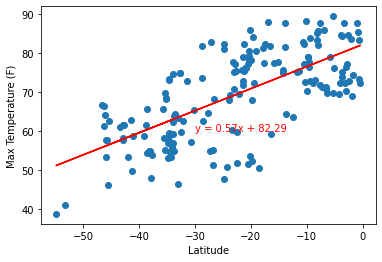

In [52]:
#The a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])
annotate(equation, -30 , 60)

#title
plt.title = ("Southern Hemisphere - Max Temp vs Latitude Linear Regression")

#labels
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

#saving the image
#plt.savefig("../Python-APIs/Southern Hemisphere - Max Temperature vs Latitude Linear Regression.png")



####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.11


Text(0, 0.5, 'Humidity (%)')

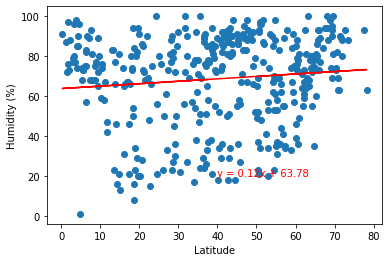

In [53]:
#The a plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])
annotate(equation, 40 , 20)

#title
plt.title = ("Northern Hemisphere - Humidity (%) vs Latitude Linear Regression")

#labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#saving the image
#plt.savefig("../Python-APIs/Northern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")



####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.28


Text(0, 0.5, 'Humidity (%)')

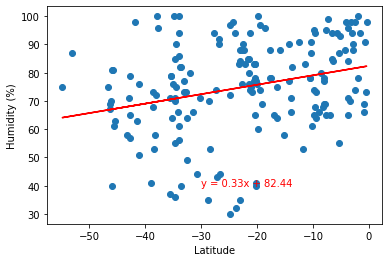

In [54]:
#The plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])
annotate(equation, -30 , 40)

#title
plt.title = ("Southern Hemisphere - Humidity (%) vs Latitude Linear Regression")

#labels
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

#saving the image
#plt.savefig("../Python-APIs/Southern Hemisphere - Humidity (%) vs Latitude Linear Regression.png")



####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.09


Text(0, 0.5, 'Cloudiness (%)')

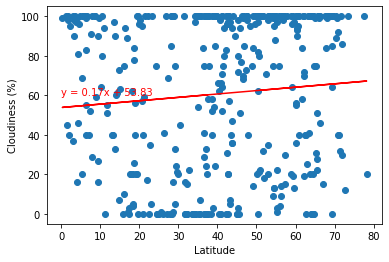

In [55]:
#The plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])
annotate(equation, 0 , 60)

#title
plt.title = ("Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression")

#labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#saving the image
#plt.savefig("../Python-APIs/Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression.png")



####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.27


Text(0, 0.5, 'Cloudiness (%)')

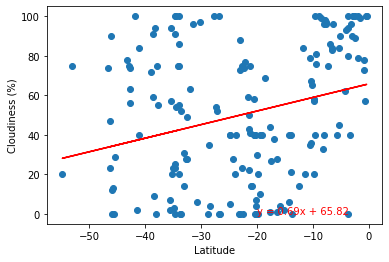

In [56]:
#The plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])
annotate(equation, -20, 0)

#title
plt.title = ("Southern Hemisphere - Cloudiness (%) vs  Latitude Linear Regression")
#labels
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

#saving the image
#plt.savefig("../Python-APIs/Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression.png")



####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : 0.15


Text(0, 0.5, 'Wind Speed (mph)')

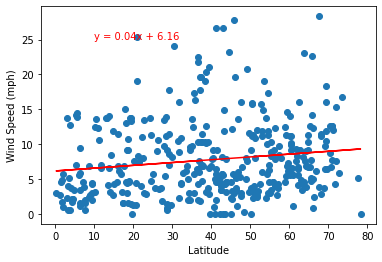

In [57]:
#The plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])
annotate(equation, 10 , 25)

#title
plt.title = ("Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")

#labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#saving the image
#plt.savefig("../Python-APIs/Northern Hemisphere - Wind Speed (mph vs Latitude Linear Regression.png")



####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.14


Text(0, 0.5, 'Wind Speed (mph)')

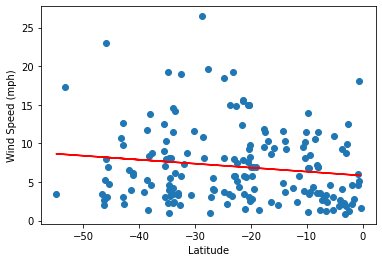

In [58]:
#The plot of Max Temp vs Latitude Linear Regression 
equation = linear_agression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])
annotate(equation, -40, 30)

#title
plt.title = ("Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression")

#labels
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

#saving the image
#plt.savefig("../Python-APIs/Southern Hemisphere - Wind Speed (mph vs Latitude Linear Regression.png")

